In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation # To visualize in animation
from IPython import display # To display in html
from matplotlib import rc
rc('text', usetex=True)

In [2]:
import os
curent = os.getcwd()
print(curent)

C:\Users\admin\Lab_training\Week9_10


# Logistic Regression
<hr>
Activation function: Sigmoid $\sigma(s) = \frac{1}{1+e^{-s}}$, $a=\sigma(z) = \sigma (\textbf{x}^{T}.\textbf{w})$<br>
Loss function: Cross Entropy for each points $ J(\textbf{w};\textbf{x}_i,\textbf{y}_i) = -(y_i\log{a_i}+(1-y_i)\log{(1-a_i)}) $ <br>
Gradient Descent: SGD: $\textbf{w} \leftarrow \textbf{w} -\eta (a_i - y_i)\textbf{x}_i $ 

**Weight Decay**
$$J = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i\log{a_i}+(1-y_i)\log(1-a_i)+\frac{\lambda}{2}||\textbf{w}||_{2}^{2}\right)$$
Gradient Descent: SGD: $\textbf{w} \leftarrow \textbf{w} -\eta \left((a_i - y_i)\textbf{x}_i+\lambda\textbf{w} \right)$ 

In [3]:
def sigmoid(s):
    return 1./(1+torch.exp(-s))

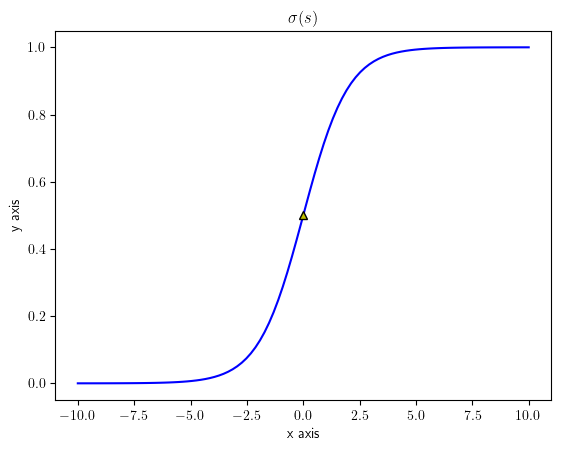

In [4]:
xx = torch.linspace(-10,10,100)
yy = sigmoid(xx)
plt.plot(xx,yy,'b-')
plt.plot(0,1/2,'y^', markeredgecolor = 'k')
plt.title('$\sigma(s)$')
plt.xlabel(r'x axis')
plt.ylabel(r'y axis')
plt.savefig(curent+'\ForLatex\sigmoid.pdf');

In [5]:
def prob(X, w):
    return sigmoid(X@w)

def loss(X, y, w, lam):
    a = prob(X, w)
    loss_ = -torch.mean(y*torch.log(a) + (1-y)*torch.log(1-a))
    weight_decay = 0.5*lam*torch.linalg.norm(w,2)**2
    return loss_+weight_decay

In [6]:
def logistic_regression(w_init, X, y, lam = 0.01, eta = 0.1, nepoches = 2000):
    w = [w_init]
    loss_hist = [loss(X,y,w_init,lam)]
    N, d = X.shape
    it = 0
    for epoch in range(nepoches):
        rd_id = torch.randperm(N) # stochastic
        for i in range(N):
            idx = rd_id[i]
            xi = X[idx].reshape(-1,1)
            yi = y[idx]
            g = (sigmoid(xi.T.mm(w[-1]))-yi)*xi+lam*w[-1]
            w_new = w[-1] - eta*g
            if torch.linalg.norm(g)/w_init.size()[0]<1e-3:
                return w, epoch, it, loss_hist
            w.append(w_new)
            loss_hist.append(loss(X,y,w_new,lam))
            it+=1
    return w, epoch, it, loss_hist

In [ ]:
def predict(X, w):
    return torch.round(prob(X,w)) # threshold = 1/2

## One dimensional case

In [7]:
np.random.seed(2)
X = torch.Tensor([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T # Time of studying
y = torch.Tensor([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]).reshape(-1,1) # Labels

# bias trick
Xbar = torch.cat((X, torch.ones((X.shape[0], 1))), axis = 1)
w_init = torch.randn(Xbar.shape[1]).reshape(-1,1)
lam = 0.0001
w, ep, it, loss_hist = logistic_regression(w_init, Xbar, y, lam, eta = 0.05, nepoches
= 500)
print('Solution of Logistic Regression:', w[-1])
print('After {} epochs, {} iterations'.format(ep, it))
print('Final loss:', loss_hist[-1])

Solution of Logistic Regression: tensor([[ 1.4436],
        [-4.1130]])
After 499 epochs, 10000 iterations
Final loss: tensor(0.4052)


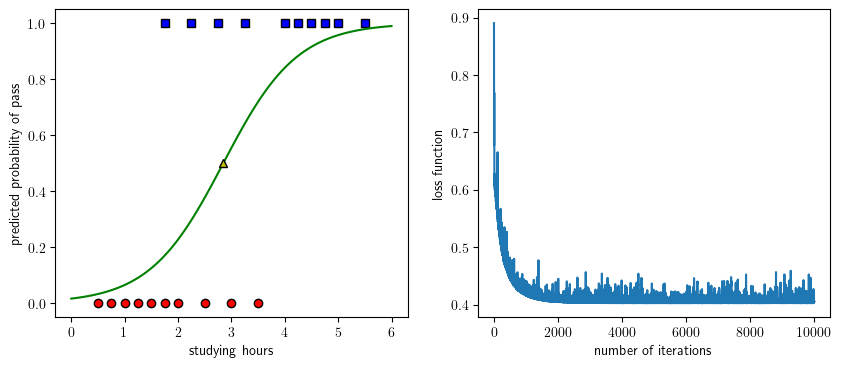

In [8]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,4)
ax = ax.flatten()

ax[0].plot(X[torch.where(y==1)], y[y==1], 'bs', markeredgecolor = 'k')
ax[0].plot(X[torch.where(y==0)], y[y==0], 'ro', markeredgecolor = 'k')
xx = torch.linspace(0, 6, 100)
xxbar = torch.cat((xx.reshape(-1,1), torch.ones((xx.shape[0],1))), dim = 1)
yy = prob(xxbar, w[-1])
ax[0].plot(xx, yy, 'g-')
xthres = -w[-1][1]/w[-1][0] # threshold sigma = 1/2 <-> x.T.w = 0
ax[0].plot(xthres,1/2,'y^',markeredgecolor = 'k')
ax[0].set_xlabel('studying hours')
ax[0].set_ylabel('predicted probability of pass')

ax[1].plot(loss_hist)
ax[1].set_xlabel('number of iterations')
ax[1].set_ylabel('loss function')

fig.savefig(curent + '\ForLatex\logistic_1d.pdf');

## Two dimensional case

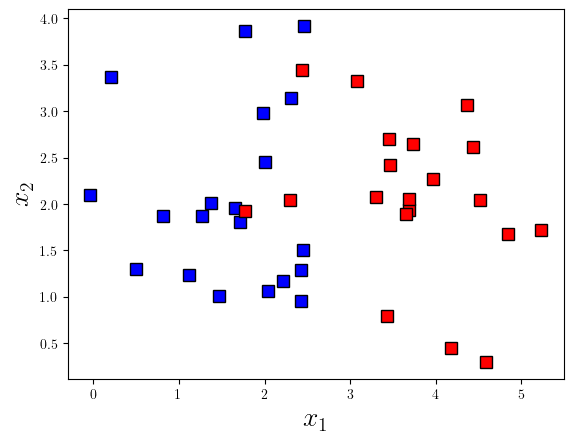

In [9]:
means = [[2,2],[4,2]]
cov = [[.7, 0], [0, .7]]
N = 20
np.random.seed(2)
X0 = torch.Tensor(np.random.multivariate_normal(means[0], cov, N))
X1 = torch.Tensor(np.random.multivariate_normal(means[1], cov, N))

plt.plot(X0[:,0].flatten(), X0[:,1].flatten(), 'bs', markeredgecolor = 'k', markersize = 8)
plt.plot(X1[:,0].flatten(), X1[:,1].flatten(), 'rs', markeredgecolor = 'k', markersize = 8)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig(curent+'\ForLatex\logistic_2d.pdf')

In [10]:
X = torch.cat((X0,X1), dim = 0)
y = torch.cat((torch.zeros((1,N)), torch.ones((1,N))), dim = 1).T
# Xbar
Xbar = torch.cat((torch.ones((2*N, 1)), X), dim = 1)

w_init = torch.randn(Xbar.shape[1]).reshape(-1,1)

lam = 0.001
w, ep, it, loss_hist = logistic_regression(w_init, Xbar, y, lam, eta = 0.05, nepoches
= 500)
print('Solution of Logistic Regression:', w[-1])
print('After {} epochs, {} iterations'.format(ep, it))
print('Final loss:', loss_hist[-1])

Solution of Logistic Regression: tensor([[-7.2493],
        [ 2.7728],
        [ 0.0730]])
After 499 epochs, 20000 iterations
Final loss: tensor(0.2534)


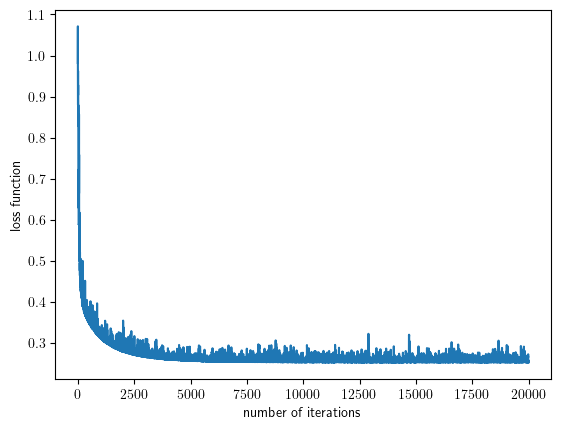

In [11]:
# Hist
plt.plot(loss_hist)
plt.xlabel('number of iterations')
plt.ylabel('loss function')
plt.savefig(curent+'\ForLatex\logistic_2d_2.pdf')

C:\Users\admin\miniconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


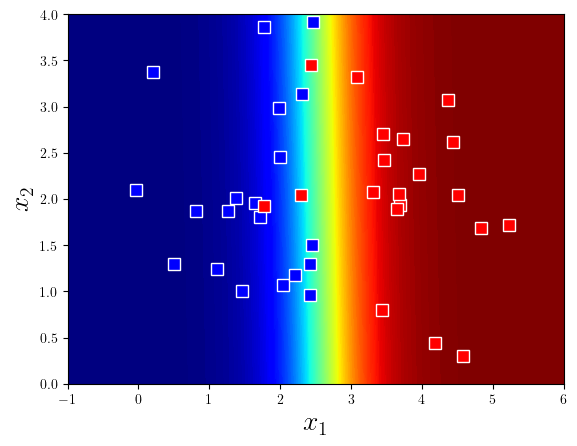

In [12]:
xx = torch.linspace(-1,6,100)
yy = torch.linspace(0,4,100)
XX, YY = torch.meshgrid(xx,yy)
Z = sigmoid(w[-1][0] + w[-1][1]*XX+w[-1][2]*YY)

plt.plot(X0[:,0].flatten(), X0[:,1].flatten(), 'bs', markeredgecolor = 'white', markersize = 8)
plt.plot(X1[:,0].flatten(), X1[:,1].flatten(), 'rs', markeredgecolor = 'white', markersize = 8)
plt.contourf(XX, YY, Z, 200, cmap = 'jet')
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig(curent + '\ForLatex\logistic_2d_3.pdf', bbox_inches = 'tight');

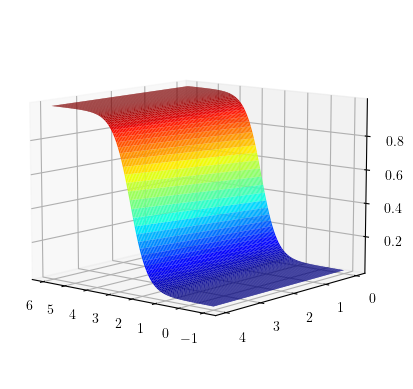

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(XX, YY, Z, cstride = 1, rstride = 1, cmap = 'jet')
ax.view_init(10,130)
plt.savefig(curent+'\ForLatex\logistic_2d_4.pdf', bbox_inches = 'tight')

## CIFAR 10

In [14]:
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as T
import torchvision.transforms.functional as TF

C:\Users\admin\miniconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [15]:
training_data = datasets.CIFAR10(root = curent+'\data',
                                 train = True,
                                 download = True,
                                 transform = T.ToTensor())
test_data = datasets.CIFAR10(root = curent+'\data',
                            train = False,
                            download = True,
                            transform = T.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


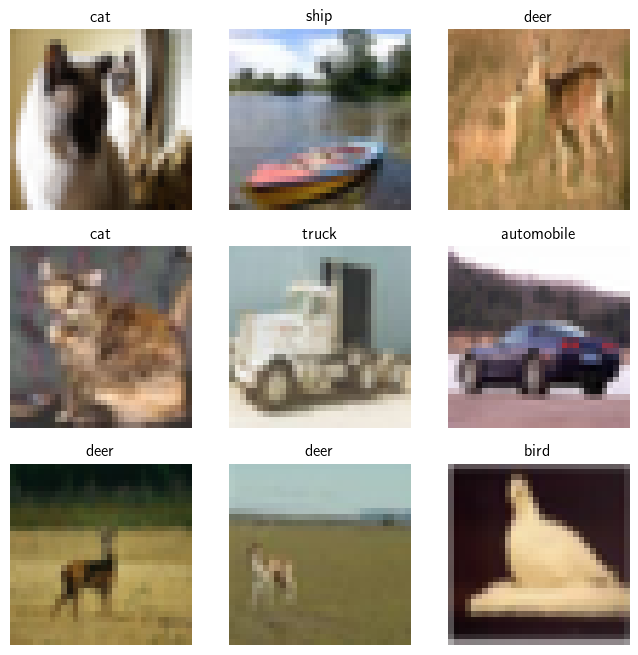

In [16]:
labels_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.permute(1,2,0).squeeze(), cmap="gray")
plt.show()